# Transpose Demo

#### Today's Topics
1. Transactions and Blocks
2. NFTs
3. Wallets
4. Fungible Tokens

## Transactions and Blocks

In [74]:
import os
from transpose import Transpose

# create a new API client with an API key
api = Transpose(os.environ.get('TRANSPOSE_KEY'))

### Transactions - where everything starts

In [75]:
# Transactions are the core primitive stored on the blockchain. Let's take a look
txns = api.block.transactions_by_date(order='desc', limit=10)
txns[0].to_dict()

{'transaction_hash': '0x9160f8b34186d319d965bd7bde8abe16928ee409e2fcf4b10a47874f288a8a43',
 'timestamp': '2022-06-17T16:50:06Z',
 'block_number': 14980242,
 'category': 'regular',
 'base_fee_per_gas': 62943663002,
 'max_priority_fee_per_gas': 1000000000,
 'max_fee_per_gas': 200000000000,
 'gas_limit': 21000,
 'gas_used': 21000,
 'gas_price': 63943663002,
 'transaction_fee': 1342816923042000,
 'fees_burned': 1321816923042000,
 'fees_rewarded': 21000000000000,
 'fees_saved': 2857183076958000,
 'nonce': 55806,
 'position': 69,
 'type': 2,
 'from': '0x002e08000acbbaE2155Fab7AC01929564949070d',
 'to': '0x1B3a2e80DE151aF8a5A31c3731aFAC94b07695Bc',
 'value': 1980256112000000000,
 'method_id': None,
 'method_args': None,
 'contract_address': None,
 'internal_transaction_count': 0,
 'log_count': 0}

### Blocks

In [76]:
# Transactions are grouped together into blocks, which are added sequentially to the chain
blocks = api.block.blocks_by_number(order='desc', limit=10)
blocks[0].to_dict()

{'block_number': 14980242,
 'block_hash': '0xd67eab72752cb779a6608caa1df8da8ef6828587de79e29260424dd378050782',
 'timestamp': '2022-06-17T16:50:06Z',
 'raw_block_data_url': 'https://cdn.transpose.io/block/14980242.json',
 'parent_hash': '0x0896f47ff64db892c657f706ded356e2f2c1b35c6728cbb04c0328dcf57006a8',
 'mix_hash': '0x6d3773fd134997d816512bbc282d5c323098ae81f961292820d8fe806fdf3341',
 'nonce': '0xa6570a45e7879c6f',
 'sha3_uncles': '0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a7413f0a142fd40d49347',
 'difficulty': 13993276989806500,
 'total_difficulty': 51937663332221221706620,
 'size': 125297,
 'base_fee_per_gas': 62943663002,
 'gas_limit': 30000000,
 'gas_used': 5954535,
 'total_fees_burned': 374800244373614070,
 'total_fees_rewarded': 51411414432949183,
 'total_fees_saved': 279660427195087414,
 'transaction_count': 68,
 'miner': '0x829BD824B016326A401d083B33D092293333A830',
 'mining_reward': 2051411414432949183,
 'uncle_count': 0,
 'uncles': []}

In [88]:
# Let's try retrieving all the transactions in this block
bn = 14980242
block_txns = api.block.transactions_by_block(block_number_above=bn, block_number_below=bn, limit=500)
print("Found {} txns for block {}".format(len(block_txns), bn))
block_txns[0].to_dict()

Found 68 txns for block 14980242


{'transaction_hash': '0xaa573afe82527302cf6e1da9b13264594480ebfbd97fab42523b397c7749b9a7',
 'timestamp': '2022-06-17T16:50:06Z',
 'block_number': 14980242,
 'category': 'contract_execution',
 'base_fee_per_gas': 62943663002,
 'max_priority_fee_per_gas': 62943663002,
 'max_fee_per_gas': 62943663002,
 'gas_limit': 213412,
 'gas_used': 113412,
 'gas_price': 62943663002,
 'transaction_fee': 7138566708382824,
 'fees_burned': 7138566708382824,
 'fees_rewarded': 0,
 'fees_saved': 0,
 'nonce': 30671,
 'position': 0,
 'type': 2,
 'from': '0x3eADde4a48d0AEbda37eEd7076e736edaC9a8b40',
 'to': '0x0000000099cB7fC48a935BcEb9f05BbaE54e8987',
 'value': 0,
 'method_id': '0x00000009',
 'method_args': ['0896f47fa0b86991c6218b36c1d19d4a2e9eb0ce3606eb480100000000000000',
  'c221b7e65ffc80de234bbb6667abdd46593d34f0000000000000000000000000',
  '7270233ccae676e776a659affc35219e6fcfbb10000bb8000000000000000000',
  '00000000000000000000000061840f6400000000000000000000000000000000'],
 'contract_address': None,
 '

### Logs

In [89]:
# Getting logs for a specific transaction
logs = api.block.logs_by_transaction(block_txns[0].transaction_hash)
logs[0].to_dict()

{'block_number': 14980242,
 'log_index': 0,
 'transaction_position': 0,
 'transaction_hash': '0xaa573afe82527302cf6e1da9b13264594480ebfbd97fab42523b397c7749b9a7',
 'timestamp': '2022-06-17T16:50:06Z',
 'address': '0xc221b7E65FfC80DE234bbB6667aBDd46593D34F0',
 'topics': ['0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef',
  '0x0000000000000000000000007270233ccae676e776a659affc35219e6fcfbb10',
  '0x0000000000000000000000000000000099cb7fc48a935bceb9f05bbae54e8987'],
 'data': '0x0000000000000000000000000000000000000000000001c2455fbd79feb0fb4c'}

### Transactions and Blocks Summary

- This is similar data to what you'd get from an RPC API
- We provide it for completeness, but alone it's not easy to work with
- Consistent data models help

But working with blockchain data can be much easier.

## NFTs

- Retrieve info about a collection
- Quickly retrieve cached images and metadata from the CDN
- Query NFTs by owner
- Work with trait data

In [90]:
# Let's check out an NFT Contract

bayc_contract_address = "0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D"
bayc = api.nft.collections_by_contract_address(bayc_contract_address)
bayc[0].to_dict()

{'contract_address': '0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D',
 'name': 'BoredApeYachtClub',
 'symbol': 'BAYC',
 'description': 'The Bored Ape Yacht Club is a collection of 10,000 unique Bored Ape NFTs— unique digital collectibles living on the Ethereum blockchain. Your Bored Ape doubles as your Yacht Club membership card, and grants access to members-only benefits, the first of which is access to THE BATHROOM, a collaborative graffiti board. Future areas and perks can be unlocked by the community through roadmap activation. Visit www.BoredApeYachtClub.com for more details.',
 'created_timestamp': '2021-04-22T23:13:40Z',
 'standard': 'ERC-721',
 'count': 10000,
 'external_url': 'http://www.boredapeyachtclub.com/',
 'image_url': 'https://cdn.transpose.io/collection/0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D/image.png',
 'twitter_username': 'BoredApeYC',
 'telegram_url': None,
 'discord_url': 'https://discord.gg/3P5K3dzgdB',
 'is_nsfw': False,
 'opensea_slug': 'boredapeyachtclub',
 '

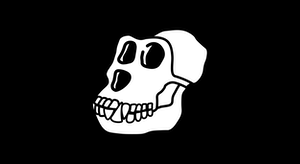

In [91]:
# Let's take a look at the collection's icon
from IPython.display import display

display(api.cdn.query(bayc[0].image_url).image())

In [92]:
# Now let's take a look at the first 500 NFTs in the Bored Ape collection

nfts = api.nft.nfts_by_contract_address(bayc_contract_address, limit=500)
print("{} nfts retrieved\n".format(len(nfts)))
nfts[0].to_dict()

500 nfts retrieved



{'contract_address': '0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D',
 'token_id': 0,
 'name': None,
 'description': None,
 'minted_timestamp': '2021-04-22T23:13:40Z',
 'supply': 1,
 'approved_address': None,
 'image_url': 'https://cdn.transpose.io/nft/0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D/0/image.png',
 'media_url': None,
 'external_url': None,
 'properties': [{'trait_type': 'Earring', 'value': 'Silver Hoop'},
  {'trait_type': 'Background', 'value': 'Orange'},
  {'trait_type': 'Fur', 'value': 'Robot'},
  {'trait_type': 'Clothes', 'value': 'Striped Tee'},
  {'trait_type': 'Mouth', 'value': 'Discomfort'},
  {'trait_type': 'Eyes', 'value': 'X Eyes'}],
 'metadata_url': 'https://cdn.transpose.io/nft/0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D/0/metadata.json',
 'last_refreshed': '2022-05-27T21:24:18Z'}

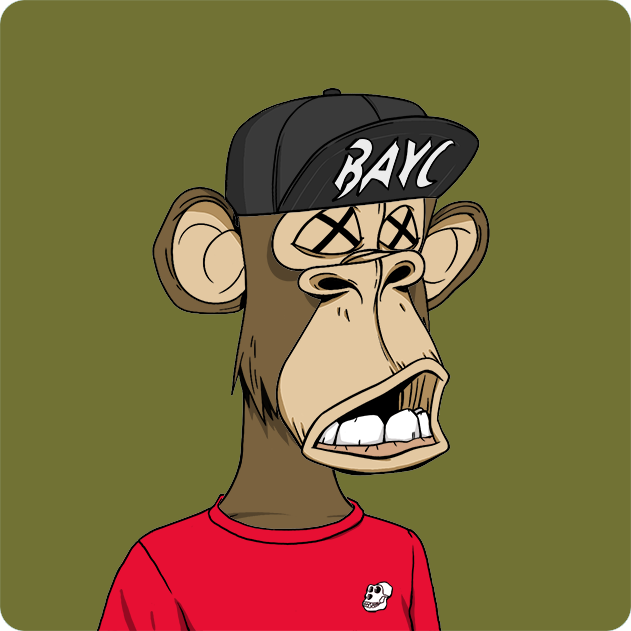

In [93]:
img = api.cdn.query(nfts[5].image_url).image()
display(img)

## Wallet

In [94]:
# Here's how we pull a wallet's nft balance

wallet = '0x3f4C85754A36Cb81067a0A88Bb1f83B9Cef97a91'
ens_address = "0x57f1887a8BF19b14fC0dF6Fd9B2acc9Af147eA85"

all_nfts = api.nft.nfts_by_owner(wallet, limit=50)
nfts = api.nft.nfts_by_owner(wallet, ens_address, limit=50)


print("{} nfts retrieved".format(len(all_nfts)))
print("{} nfts retrieved when including only ENS NFTs".format(len(nfts)))

18 nfts retrieved
10 nfts retrieved when including only ENS NFTs


In [95]:
nfts[1].to_dict()

{'contract_address': '0x57f1887a8BF19b14fC0dF6Fd9B2acc9Af147eA85',
 'token_id': 18354910724490046497235867424966528081227979364407693952525073992844141611065,
 'name': 'mcalvey.eth',
 'description': 'mcalvey.eth, an ENS name.',
 'minted_timestamp': '2022-04-27T21:39:00Z',
 'supply': 1,
 'approved_address': None,
 'image_url': 'https://cdn.transpose.io/nft/0x57f1887a8BF19b14fC0dF6Fd9B2acc9Af147eA85/18354910724490046497235867424966528081227979364407693952525073992844141611065/image.png',
 'media_url': None,
 'external_url': 'https://app.ens.domains/name/mcalvey.eth',
 'properties': [{'trait_type': 'Name', 'value': 'mcalvey.eth'},
  {'trait_type': 'Length', 'value': 11},
  {'trait_type': 'ENS Node',
   'value': 'E0B61697A14B205286DABFE23582BEEAD3276A7F8431B61E49A72932569395A7'},
  {'trait_type': 'Token ID',
   'value': 18354910724490046497235867424966528081227979364407693952525073992844141611065},
  {'trait_type': 'Resolver',
   'value': '0x4976fb03C32e5B8cfe2b6cCB31c09Ba78EBaBa41'},
  {'

In [96]:
# Token data is accessible the same way
tokens = api.token.tokens_by_owner(wallet)
len(tokens)

1

### Full support ERC-1155 Semi Fungible tokens

Often used in gaming applications, these tokens include a balance.

In [97]:
genesis_888 = '0x36d30B3b85255473D27dd0F7fD8F35e36a9d6F06'

owners = api.nft.owners_by_contract_address(genesis_888, limit=500)
owners[0].to_dict()

{'contract_address': '0x36d30B3b85255473D27dd0F7fD8F35e36a9d6F06',
 'token_id': 888,
 'owner': '0x000000000000000000000000000000000000dEaD',
 'balance': 2797}

### All of a wallet's transfers are easily available

In [98]:
# Pulling the wallet's activity is just as easy

api.nft.transfers_by_account(wallet)[:3]

[<NFTTransferObject:  transaction_hash="0xa285cca338139c0d2fdc08ee368c4be313a64eb4efa3fb7ee0ce7ba410cfe636"  from="0xF3F97c46F91223cFC5d727b69a78Ef0D7099e9B1"  to="0x3f4C85754A36Cb81067a0A88Bb1f83B9Cef97a91"  contract_address="0x1347A97789cd3Aa0b11433E8117F55Ab640A0451"  token_id="9144">,
 <NFTTransferObject:  transaction_hash="0xad2481faaf98c74ed5468a408fe656b0df355f0f8c324c392c82d84178e1d4ad"  from="0xc81cB5baB6f20117D94a2248777C9C3619103596"  to="0x3f4C85754A36Cb81067a0A88Bb1f83B9Cef97a91"  contract_address="0x1347A97789cd3Aa0b11433E8117F55Ab640A0451"  token_id="3538">,
 <NFTTransferObject:  transaction_hash="0xb90fb32ceddc573194b4ef7113e97ae8e2458dc090bba7b79dabd155002af361"  from="0x3f4C85754A36Cb81067a0A88Bb1f83B9Cef97a91"  to="0x6b912F9Dd1A35794f6CAb59Fdd1adCA0794A64D0"  contract_address="0x1347A97789cd3Aa0b11433E8117F55Ab640A0451"  token_id="9144">]

In [99]:
api.nft.transfers_by_account(wallet, limit=1)[0].to_dict()

{'contract_address': '0x1347A97789cd3Aa0b11433E8117F55Ab640A0451',
 'token_id': 9144,
 'block_number': 14161759,
 'log_index': 51,
 'transaction_hash': '0xa285cca338139c0d2fdc08ee368c4be313a64eb4efa3fb7ee0ce7ba410cfe636',
 'timestamp': '2022-02-07T22:45:37Z',
 'category': 'send',
 'operator': None,
 'from': '0xF3F97c46F91223cFC5d727b69a78Ef0D7099e9B1',
 'to': '0x3f4C85754A36Cb81067a0A88Bb1f83B9Cef97a91',
 'quantity': 1}

### Mints are pulled the same way

In [100]:
api.nft.transfers_by_account(wallet, transfer_category='mint', limit=1)[0].to_dict()

{'contract_address': '0x8E7D9F344C525A4B161BC1959fd217eb34ECD010',
 'token_id': 39,
 'block_number': 14303054,
 'log_index': 112,
 'transaction_hash': '0x47adeba317639dccb253221d7116faa74dbee8ee5b17afa73599558552eebd98',
 'timestamp': '2022-03-01T19:41:10Z',
 'category': 'mint',
 'operator': None,
 'from': None,
 'to': '0x3f4C85754A36Cb81067a0A88Bb1f83B9Cef97a91',
 'quantity': 1}

### Charting recent mints

5000 mints retrieved
Took 6.174338102340698s


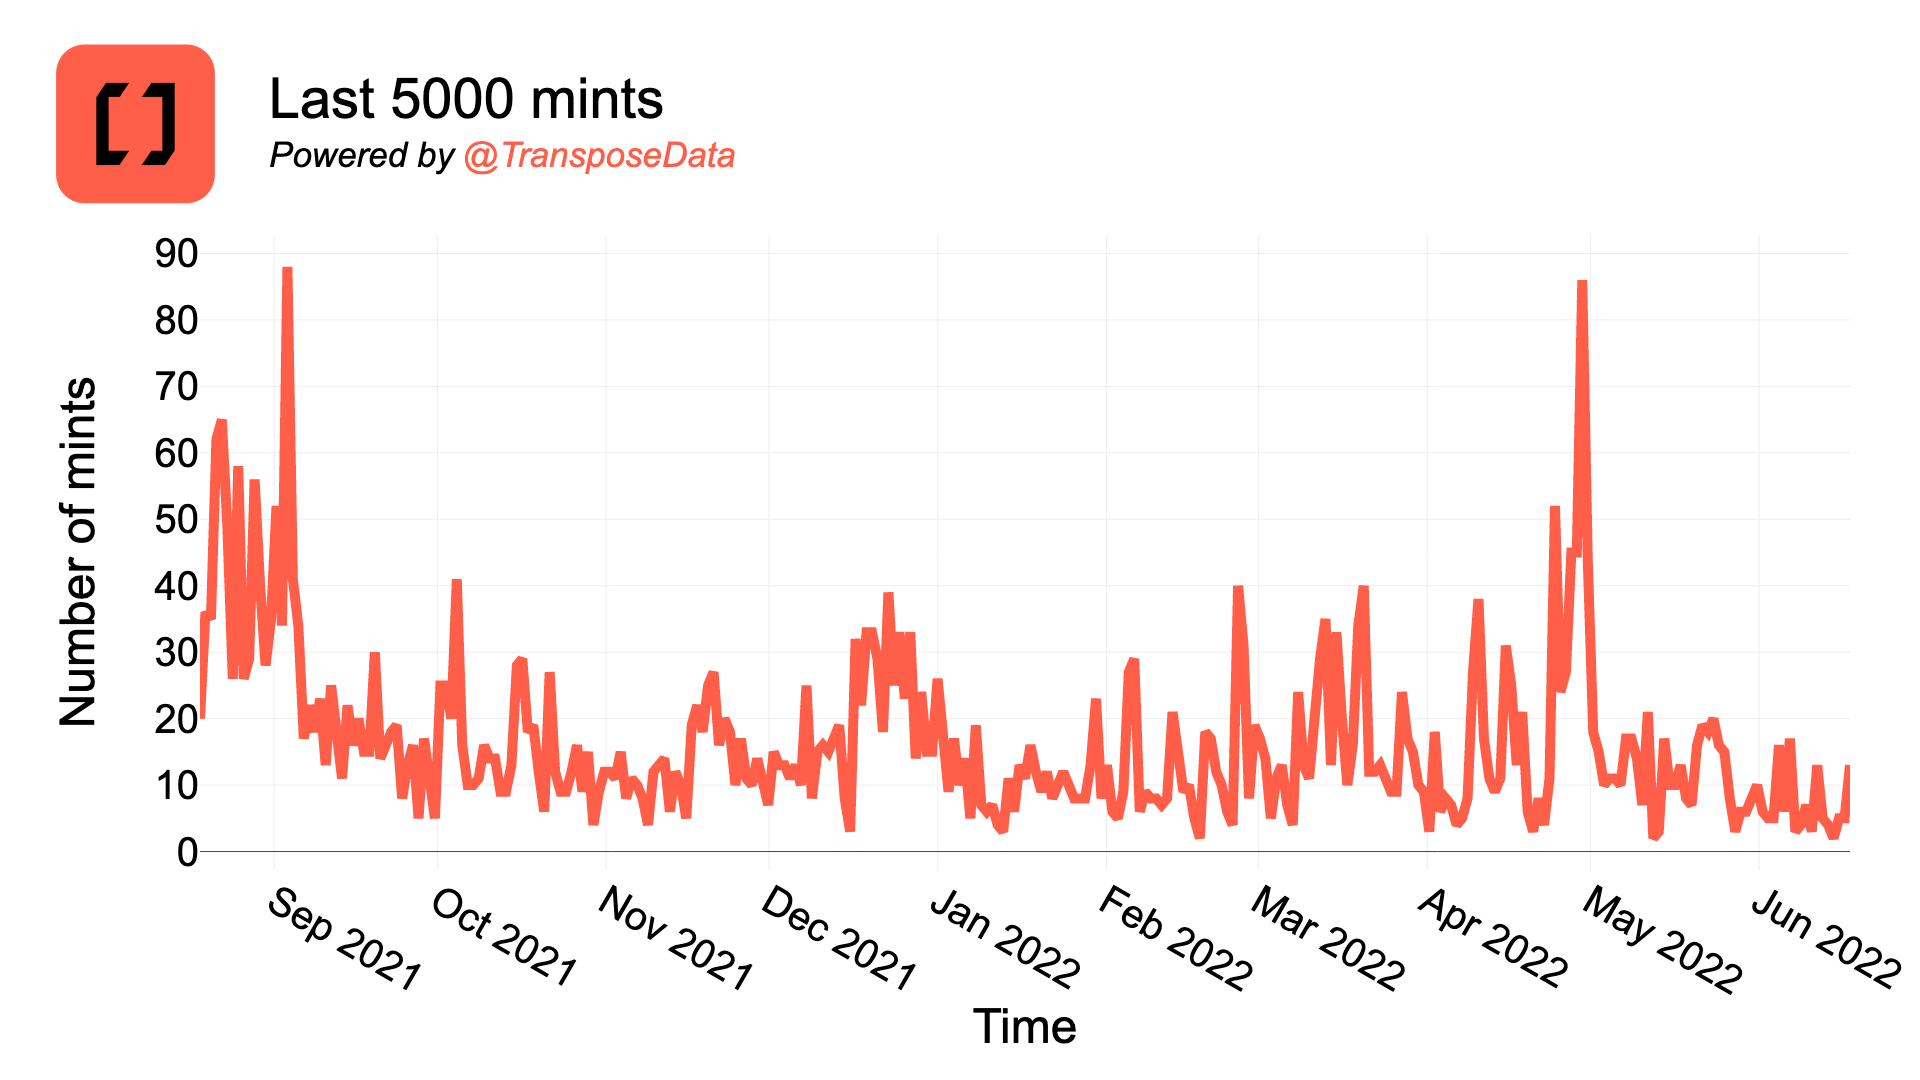

In [101]:
import pandas as pd
from IPython.display import Image
from transpose.extras import Plot
import time

t0 = time.time()
crypto_kitties_address = '0x06012c8cf97BEaD5deAe237070F9587f8E7A266d'

bulk_transfers = api.bulk_request(api.nft.transfers_by_contract_address(crypto_kitties_address, transfer_category='mint', limit=500, order='desc'), 20, 5000)
print("{} mints retrieved".format(len(bulk_transfers)))

# Aggregate by day
counts = {}
for transfer in bulk_transfers:
    if transfer.timestamp[:10] in counts.keys():
        counts[transfer.timestamp[:10]] += 1
    else:
        counts[transfer.timestamp[:10]] = 1
counts_list = [counts[x] for x in counts.keys()]
x = pd.date_range(bulk_transfers[0].timestamp, bulk_transfers[-1].timestamp, periods=len(counts_list))

# Set up chart
chart = Plot(title="Last 5000 mints")    
chart.add_data({
    'x': x,
    'y': counts_list,
    'y_axis': "Number of mints",
    'x_axis': "Time"
})

print("Took {}s".format(str(time.time() - t0)))
chart.render(path='/Users/mcalvey/Documents/transpose/code.nosync/live-demo/img/transfers.png', format='png')
Image(filename='/Users/mcalvey/Documents/transpose/code.nosync/live-demo/img/transfers.png')

## Fungible Tokens

### Let's dive into WETH

In [102]:
# Let's pull top weth holders
weth_address = "0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2"
top_holders = api.token.owners_by_contract_address(weth_address, limit=100)
balances = [x.balance for x in top_holders]
print("{} balances found".format(len(balances)))

100 balances found


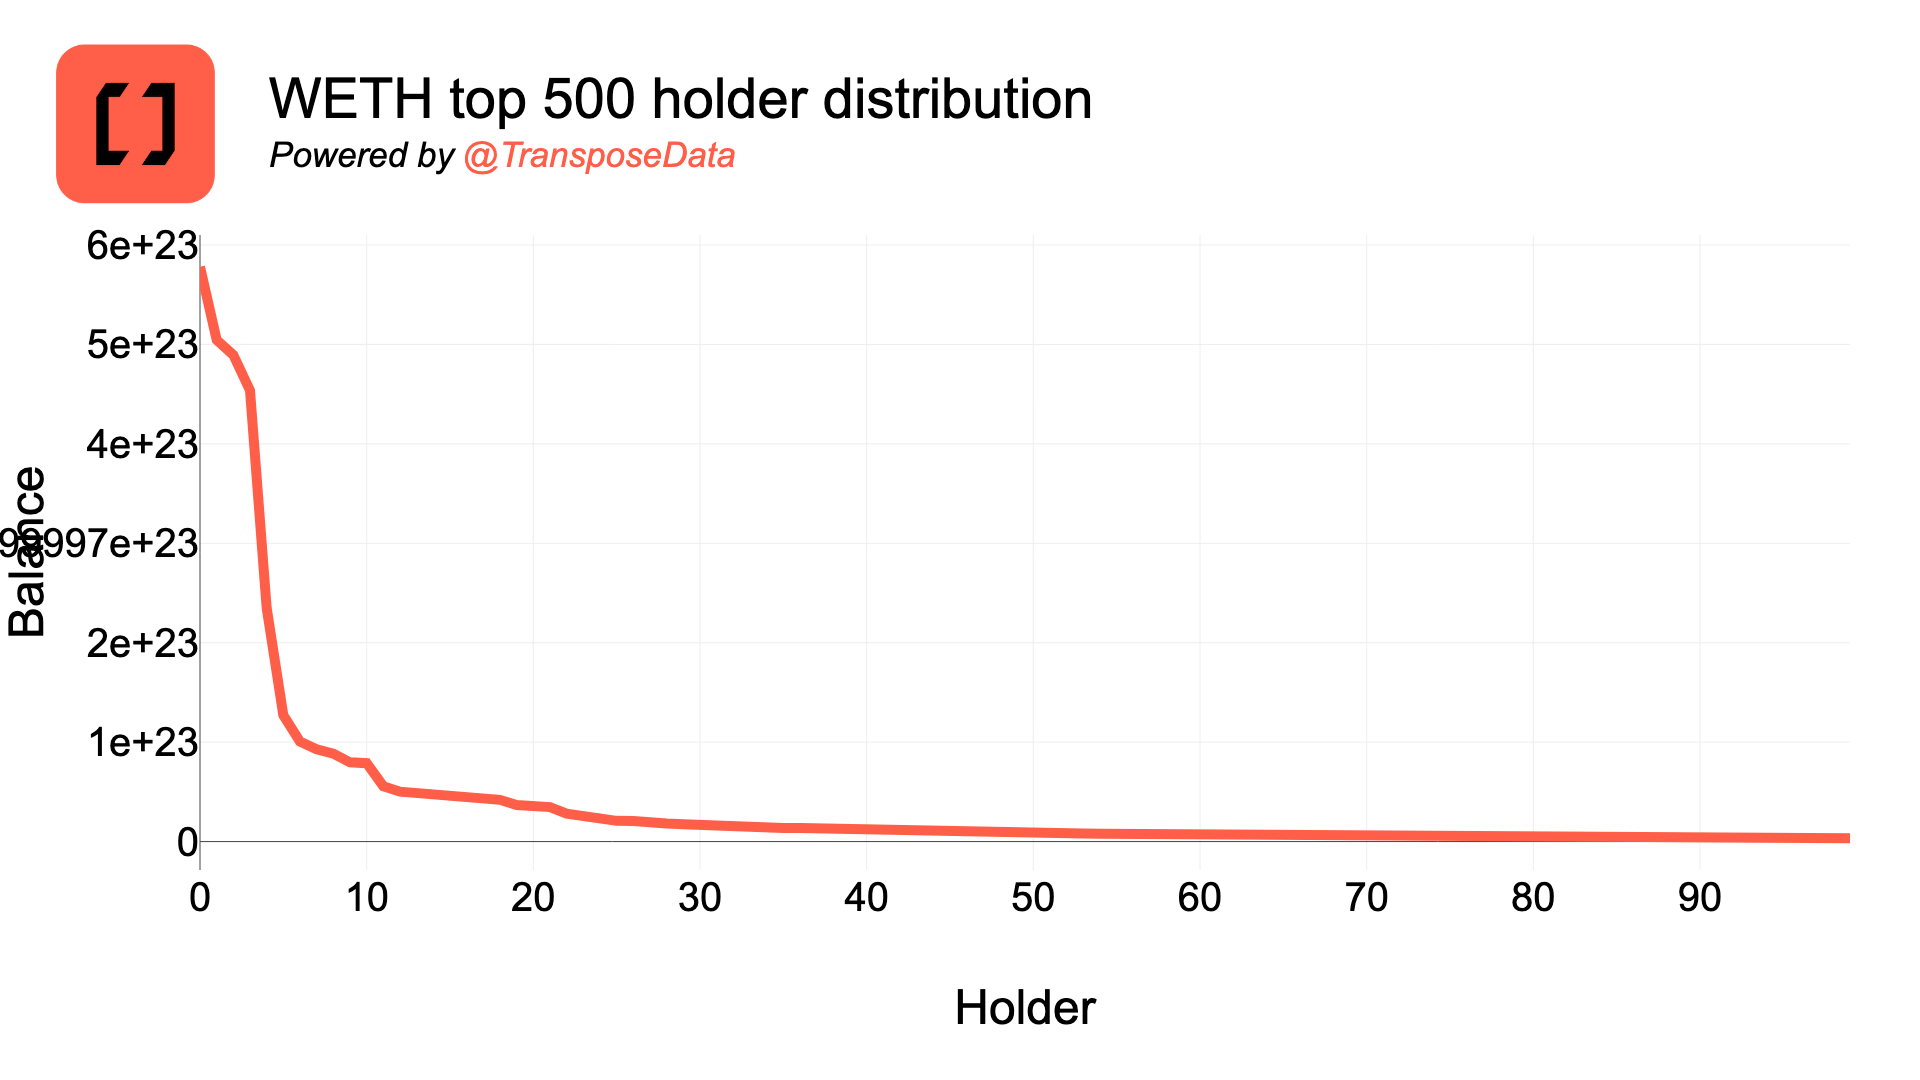

In [103]:
# How does this distribution look?
chart = Plot(title="WETH top 500 holder distribution")
chart.add_data({
    'x': list(range(len(balances))),
    'y': balances,
    'y_axis': 'Balance',
    'x_axis': 'Holder'
})
chart.render(path='/Users/mcalvey/Documents/transpose/code.nosync/live-demo/img/transfers.png', format='png')
Image(filename='/Users/mcalvey/Documents/transpose/code.nosync/live-demo/img/transfers.png')

1
2022-05-17
10000


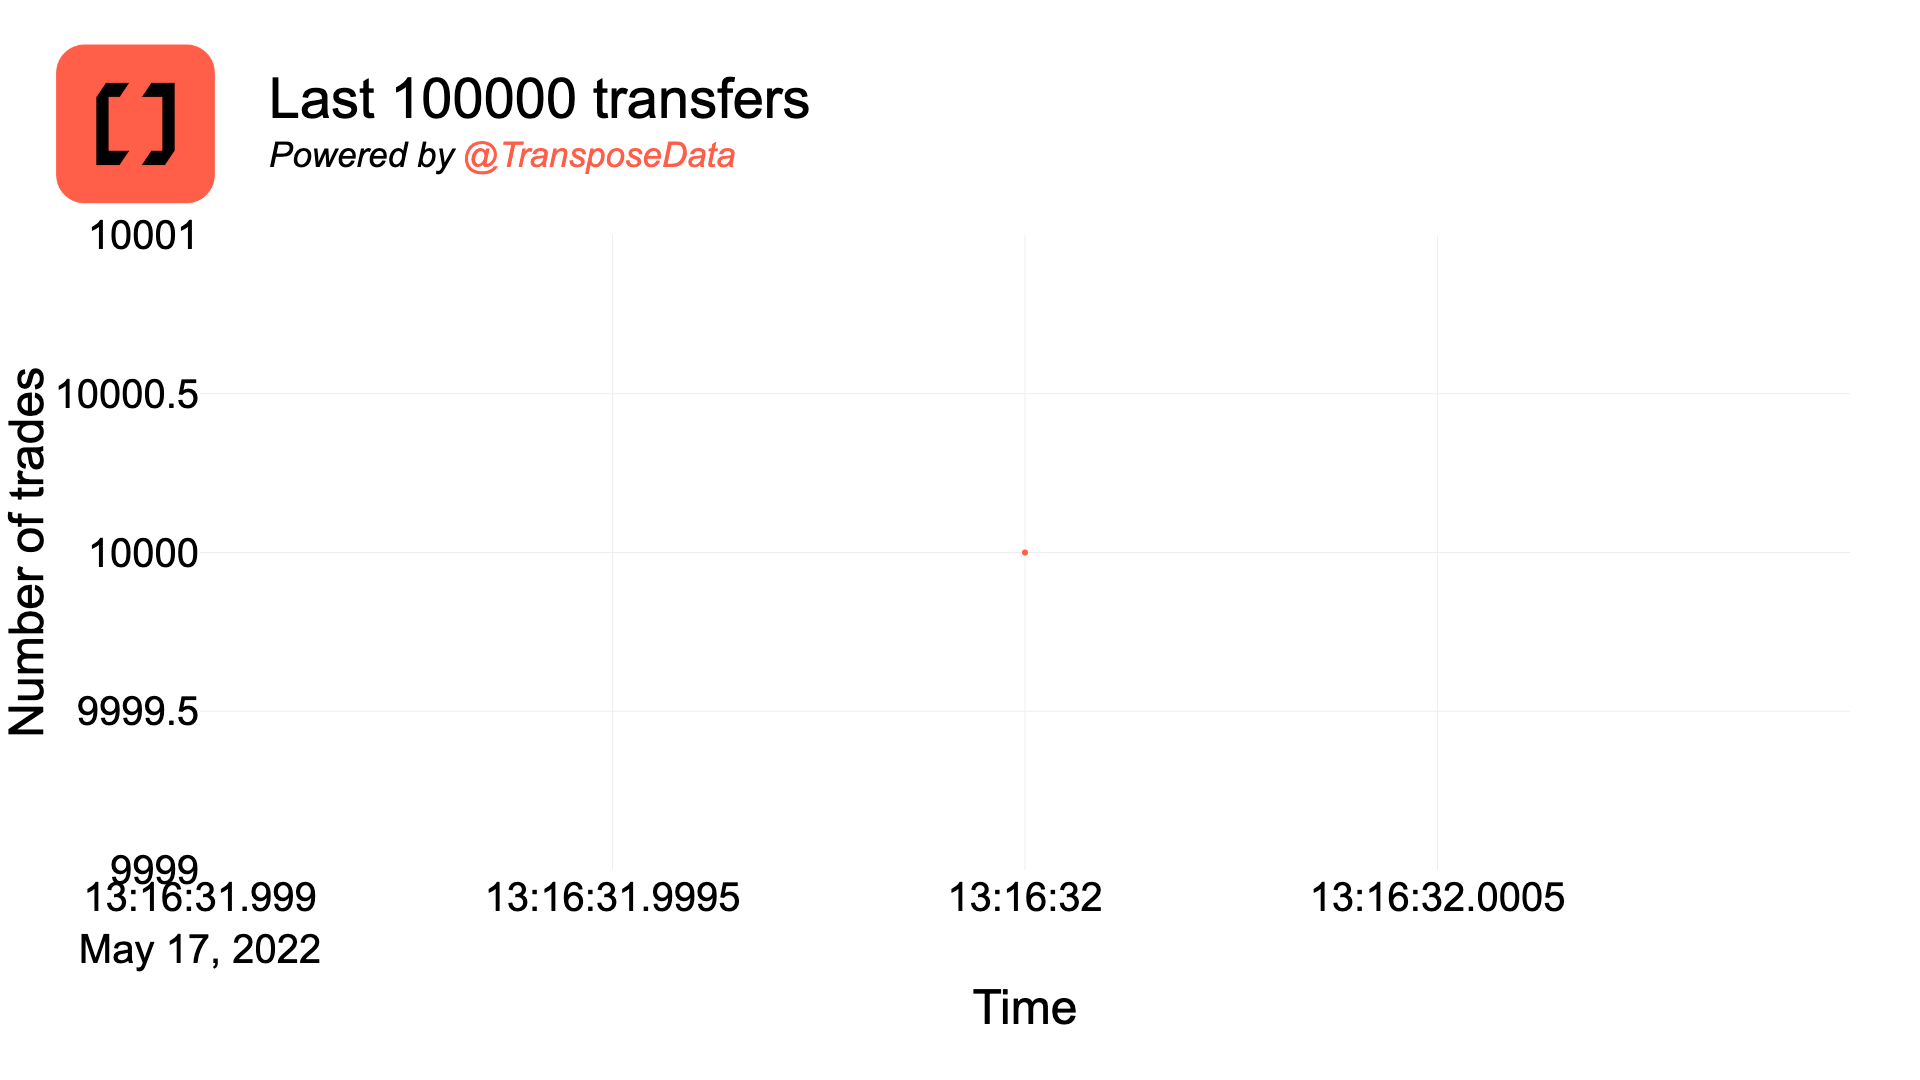

In [104]:
# Let's graph it
import datetime
import pandas as pd
from IPython.display import Image
from transpose.extras import Plot

# Get data
month_ago = datetime.datetime.now() - datetime.timedelta(days=31)
bulk_transfers = api.bulk_request(api.token.transfers_by_contract_address(weth_address, transferred_after=month_ago, limit=500), 20, 10000)

# Aggregate by day
counts = {}
for transfer in bulk_transfers:
    if transfer.timestamp[:10] in counts.keys():
        counts[transfer.timestamp[:10]] += 1
    else:
        counts[transfer.timestamp[:10]] = 1
counts_list = [counts[x] for x in counts.keys()]
x = pd.date_range(bulk_transfers[0].timestamp, bulk_transfers[-1].timestamp, periods=len(counts_list))

print(len(counts))
for i in counts.keys():
    print(i)
    print(counts[i])
    break
    
# Set up chart
chart = Plot(title="Last 100000 transfers")    
chart.add_data({
    'x': x,
    'y': counts_list,
    'y_axis': "Number of trades",
    'x_axis': "Time"
})

chart.render(path='/Users/mcalvey/Documents/transpose/code.nosync/live-demo/img/transfers.png', format='png')
Image(filename='/Users/mcalvey/Documents/transpose/code.nosync/live-demo/img/transfers.png')

## Extras

### Bored Ape Holder Analysis

In [105]:
import time
# Time to dive deeper into holder data

# Get all holders of the NFT
t0 = time.time()
all_holders = api.bulk_request(api.nft.owners_by_contract_address(contract_address=bayc_contract_address, limit=500), 20, 10000)
t1 = time.time()
print("Took: {}".format(t1 - t0))
print("Total holders: " + str(len(all_holders)))

Took: 17.07339596748352
Total holders: 10000


In [106]:
# calculate how many BAYC tokens are held by each holder

number_owned_per_holder = {}
for holder in all_holders:
    if holder.owner in number_owned_per_holder: number_owned_per_holder[holder.owner] += 1
    else: number_owned_per_holder[holder.owner] = 1
sorted_holders = sorted(number_owned_per_holder.items(), key=lambda x: x[1], reverse=True)

top_holder = sorted_holders[0][0]
sorted_holders[:10]

[('0xDBfD76AF2157Dc15eE4e57F3f942bB45Ba84aF24', 265),
 ('0x1b523DC90A79cF5ee5d095825e586e33780f7188', 107),
 ('0x54BE3a794282C030b15E43aE2bB182E14c409C5e', 105),
 ('0xf896527c49b44aAb3Cf22aE356Fa3AF8E331F280', 76),
 ('0x98E711f31E49C2e50C1A290b6F2b1e493E43EA76', 71),
 ('0xD38A87D7B690323Ef6883e887614502ABCf9B1EB', 70),
 ('0x8AD272Ac86c6C88683d9a60eb8ED57E6C304bB0C', 57),
 ('0x020cA66C30beC2c4Fe3861a94E4DB4A498A35872', 51),
 ('0x04F5Df957CE0405bA0264Eca6130161cFaa12571', 34),
 ('0x720A4FaB08CB746fC90E88d1924a98104C0822Cf', 33)]

In [107]:
# Let's add ENS names
named_holders = {}
for holder in sorted_holders[:5]:
    name = api.ens.primary_ens_records_by_account(holder[0])
    if name != []:
        named_holders[name[0].ens_name] = holder[1]
    else:
        named_holders[holder[0]] = holder[1]
named_holders

{'0xDBfD76AF2157Dc15eE4e57F3f942bB45Ba84aF24': 265,
 'jrnyclub.eth': 107,
 'dingaling.eth': 105,
 '0xf896527c49b44aAb3Cf22aE356Fa3AF8E331F280': 76,
 '0x98E711f31E49C2e50C1A290b6F2b1e493E43EA76': 71}

In [108]:
# Let's dive into what else the top 10 holders own

top_holders = sorted_holders[:5]
top_overlapping_contracts = {}

for holder in top_holders:
    print("Checking account address: " + holder[0])
    # get all the nfts owned by the holder
    all_nfts_owned = api.bulk_request(api.nft.nfts_by_owner(holder[0], limit=500))

    # get the contract address for each NFT and save the number of NFTs owned by each holder
    for nft in all_nfts_owned:
        if nft.contract_address in top_overlapping_contracts: top_overlapping_contracts[nft.contract_address] += 1
        else: top_overlapping_contracts[nft.contract_address] = 1

sorted_contract_addresses = sorted(top_overlapping_contracts.items(), key=lambda x: x[1], reverse=True)
sorted_contract_addresses[:10]

named_contracts = {}
for contract_address in sorted_contract_addresses[:10]:
    name = api.nft.collections_by_contract_address(contract_address[0])[0].name
    named_contracts[name] = contract_address[1]
named_contracts


Checking account address: 0xDBfD76AF2157Dc15eE4e57F3f942bB45Ba84aF24
Checking account address: 0x1b523DC90A79cF5ee5d095825e586e33780f7188
Checking account address: 0x54BE3a794282C030b15E43aE2bB182E14c409C5e
Checking account address: 0xf896527c49b44aAb3Cf22aE356Fa3AF8E331F280
Checking account address: 0x98E711f31E49C2e50C1A290b6F2b1e493E43EA76


{'Bonsai': 1055,
 'Otherdeed': 681,
 'Otherside Gold Pass': 661,
 'BoredApeYachtClub': 624,
 "Sandbox's LANDs": 587,
 'OpenSea Shared Storefront': 534,
 'Origin Stories 1': 315,
 "Pixel Vault Founder's DAO": 309,
 'Gutter Juice': 293,
 'CryptoDickbutts S3': 259}